In [2]:
from pathlib import Path
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import models

Data Load and Preprocessing


In [3]:
BacterialPneumonia = Path("./TrainData/BacterialPneumonia")
Covid = Path("./TrainData/COVID-19")
Normal = Path("./TrainData/Normal")
oversampledCovid = Path("./TrainData/OversampledAugmentedCOVID-19")
ViralPneumonia = Path("./TrainData/ViralPneumonia")

In [4]:
Over_Samp_JPG_Path = list(oversampledCovid.glob(r"*/*.jpeg"))
Covid_Path = list(Covid.glob(r"*.jpeg"))


In [5]:
Covid_JPG_Path = []
for JPG_Samp_Path in Over_Samp_JPG_Path:
    Covid_JPG_Path.append(JPG_Samp_Path)

for JPG_Covid_Path in Covid_Path:
    Covid_JPG_Path.append(JPG_Covid_Path)

Bact_Pneu_JPG_Path = list(BacterialPneumonia.glob(r"*.jpeg"))
Normal_JPG_Path = list(Normal.glob(r"*.jpeg"))
Viral_Pneu_JPG_Path = list(ViralPneumonia.glob(r"*.jpeg"))

In [6]:
print("BACT_PNEU: \n",Bact_Pneu_JPG_Path[0:5])
print("---"*20)
print("NORMAL: \n",Normal_JPG_Path[0:5])
print("---"*20)
print("VIRAL_PNEU: \n",Viral_Pneu_JPG_Path[0:5])
print("---"*20)


BACT_PNEU: 
 [WindowsPath('TrainData/BacterialPneumonia/_0_4754176.jpeg'), WindowsPath('TrainData/BacterialPneumonia/_100_1412619.jpeg'), WindowsPath('TrainData/BacterialPneumonia/_101_7326846.jpeg'), WindowsPath('TrainData/BacterialPneumonia/_102_3664806.jpeg'), WindowsPath('TrainData/BacterialPneumonia/_103_4534782.jpeg')]
------------------------------------------------------------
NORMAL: 
 [WindowsPath('TrainData/Normal/_0_6256933.jpeg'), WindowsPath('TrainData/Normal/_100_9944187.jpeg'), WindowsPath('TrainData/Normal/_101_577041.jpeg'), WindowsPath('TrainData/Normal/_102_7511919.jpeg'), WindowsPath('TrainData/Normal/_103_1225628.jpeg')]
------------------------------------------------------------
VIRAL_PNEU: 
 [WindowsPath('TrainData/ViralPneumonia/_0_9503218.jpeg'), WindowsPath('TrainData/ViralPneumonia/_100_7745125.jpeg'), WindowsPath('TrainData/ViralPneumonia/_101_8617101.jpeg'), WindowsPath('TrainData/ViralPneumonia/_102_2484120.jpeg'), WindowsPath('TrainData/ViralPneumonia/_

In [7]:
Main_JPG_Path = []

for JPGs_Bact in Bact_Pneu_JPG_Path:
    Main_JPG_Path.append(JPGs_Bact)

for JPGs_Normal in Normal_JPG_Path:
    Main_JPG_Path.append(JPGs_Normal)

for JPGs_Viral in Viral_Pneu_JPG_Path:
    Main_JPG_Path.append(JPGs_Viral)

for JPGs_Corona in Covid_JPG_Path:
    Main_JPG_Path.append(JPGs_Corona)


In [8]:
JPG_All_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Main_JPG_Path))


In [9]:
Main_JPG_Path[0]

WindowsPath('TrainData/BacterialPneumonia/_0_4754176.jpeg')

In [10]:
os.path.split(Main_JPG_Path[0])

('TrainData\\BacterialPneumonia', '_0_4754176.jpeg')

In [11]:
print("BacterialPneumonia: ",JPG_All_Labels.count("BacterialPneumonia"))
print("COVID-19: ",JPG_All_Labels.count("COVID-19"))
print("Normal: ",JPG_All_Labels.count("Normal"))
print("ViralPneumonia: ",JPG_All_Labels.count("ViralPneumonia"))

BacterialPneumonia:  650
COVID-19:  120
Normal:  901
ViralPneumonia:  412


Transformation


In [12]:
Main_JPG_Path_Series = pd.Series(Main_JPG_Path,name="JPG").astype(str)
JPG_All_Labels_Series = pd.Series(JPG_All_Labels,name="CATEGORY")



In [13]:
Main_Data = pd.concat([Main_JPG_Path_Series,JPG_All_Labels_Series],axis=1)

In [14]:
Main_Data.head(-1)


JPG            CATEGORY
0       TrainData\BacterialPneumonia\_0_4754176.jpeg  BacterialPneumonia
1     TrainData\BacterialPneumonia\_100_1412619.jpeg  BacterialPneumonia
2     TrainData\BacterialPneumonia\_101_7326846.jpeg  BacterialPneumonia
3     TrainData\BacterialPneumonia\_102_3664806.jpeg  BacterialPneumonia
4     TrainData\BacterialPneumonia\_103_4534782.jpeg  BacterialPneumonia
...                                              ...                 ...
2077             TrainData\COVID-19\_59_8203616.jpeg            COVID-19
2078              TrainData\COVID-19\_5_1196012.jpeg            COVID-19
2079              TrainData\COVID-19\_6_5598192.jpeg            COVID-19
2080              TrainData\COVID-19\_7_5253164.jpeg            COVID-19
2081              TrainData\COVID-19\_8_5127752.jpeg            COVID-19

[2082 rows x 2 columns]

In [15]:
Main_Data["CATEGORY"].value_counts()


Normal                901
BacterialPneumonia    650
ViralPneumonia        412
COVID-19              120
Name: CATEGORY, dtype: int64

In [16]:
print(Main_Data["JPG"][1])
print(Main_Data["CATEGORY"][1])
print(Main_Data["JPG"][1398])
print(Main_Data["CATEGORY"][1398])
print(Main_Data["JPG"][355])
print(Main_Data["CATEGORY"][355])
print(Main_Data["JPG"][710])
print(Main_Data["CATEGORY"][710])
print(Main_Data["JPG"][1001])
print(Main_Data["CATEGORY"][1001])
print(Main_Data["JPG"][1501])
print(Main_Data["CATEGORY"][1501])
print(Main_Data["JPG"][2033])
print(Main_Data["CATEGORY"][2033])


TrainData\BacterialPneumonia\_100_1412619.jpeg
BacterialPneumonia
TrainData\Normal\_774_3890052.jpeg
Normal
TrainData\BacterialPneumonia\_41_1883947.jpeg
BacterialPneumonia
TrainData\Normal\_154_3500926.jpeg
Normal
TrainData\Normal\_416_2901526.jpeg
Normal
TrainData\Normal\_867_6435910.jpeg
Normal
TrainData\COVID-19\_19_8534651.jpeg
COVID-19


In [17]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)


In [18]:
Main_Data.head(-1)


JPG            CATEGORY
0                    TrainData\Normal\_773_3051618.jpeg              Normal
1                    TrainData\Normal\_223_5454216.jpeg              Normal
2        TrainData\BacterialPneumonia\_101_7326846.jpeg  BacterialPneumonia
3             TrainData\ViralPneumonia\_57_7820748.jpeg      ViralPneumonia
4                    TrainData\Normal\_280_4332455.jpeg              Normal
...                                                 ...                 ...
2077                 TrainData\Normal\_375_1224110.jpeg              Normal
2078                 TrainData\Normal\_413_3268606.jpeg              Normal
2079          TrainData\ViralPneumonia\_91_3943578.jpeg      ViralPneumonia
2080     TrainData\BacterialPneumonia\_348_2721793.jpeg  BacterialPneumonia
2081  TrainData\OversampledAugmentedCOVID-19\COVID-1...            COVID-19

[2082 rows x 2 columns]

Data visualization


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\aritr\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


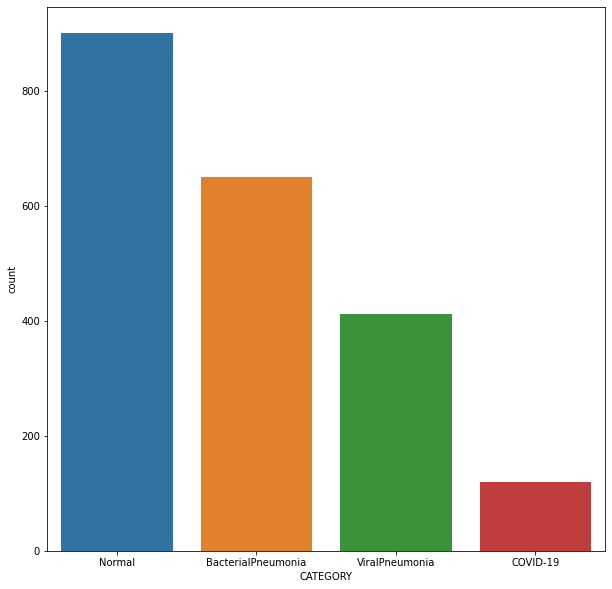

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(Main_Data['CATEGORY'])
plt.show()


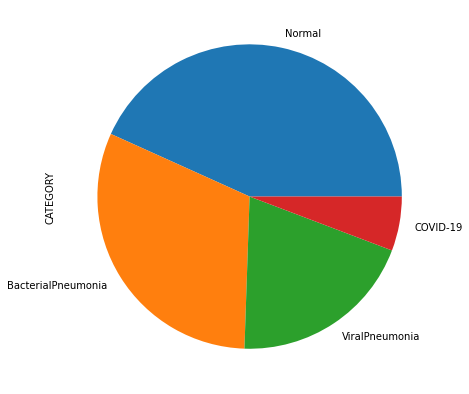

In [21]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize = (7,7))
plt.show()

Text(0.5, 1.0, 'Normal')

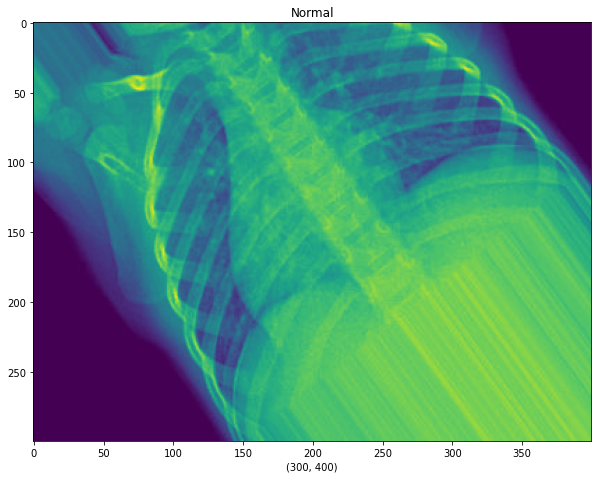

In [22]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Normal')

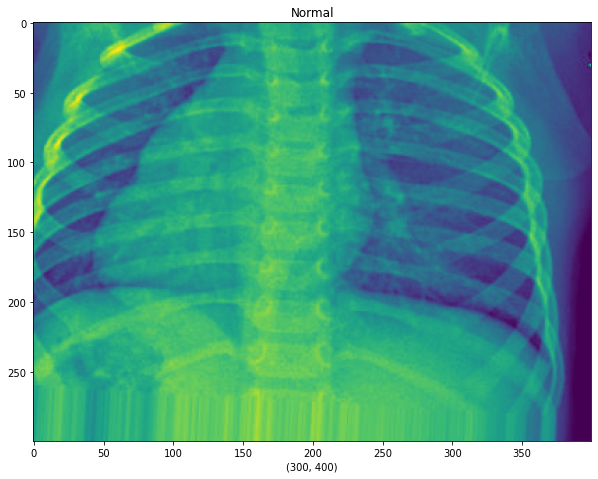

In [23]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][1])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][1])


Text(0.5, 1.0, 'Normal')

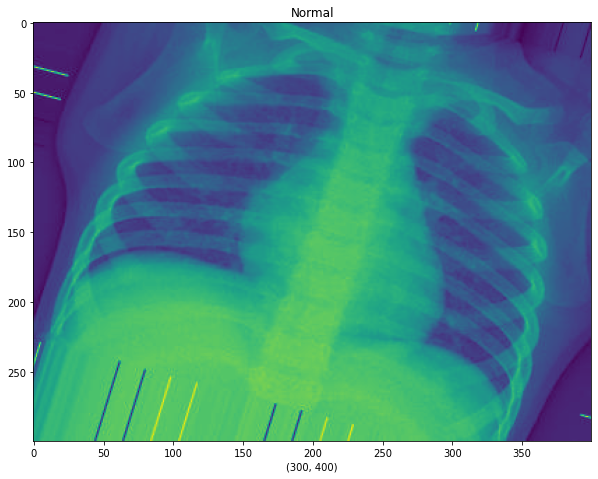

In [24]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][2078])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][2078])

Text(0.5, 1.0, 'ViralPneumonia')

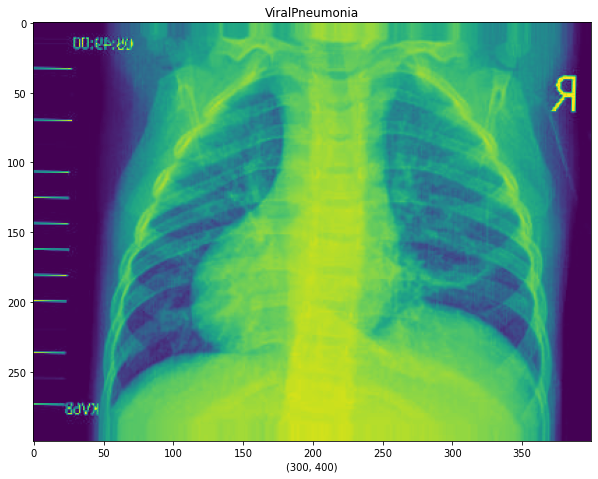

In [25]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][105])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][105])


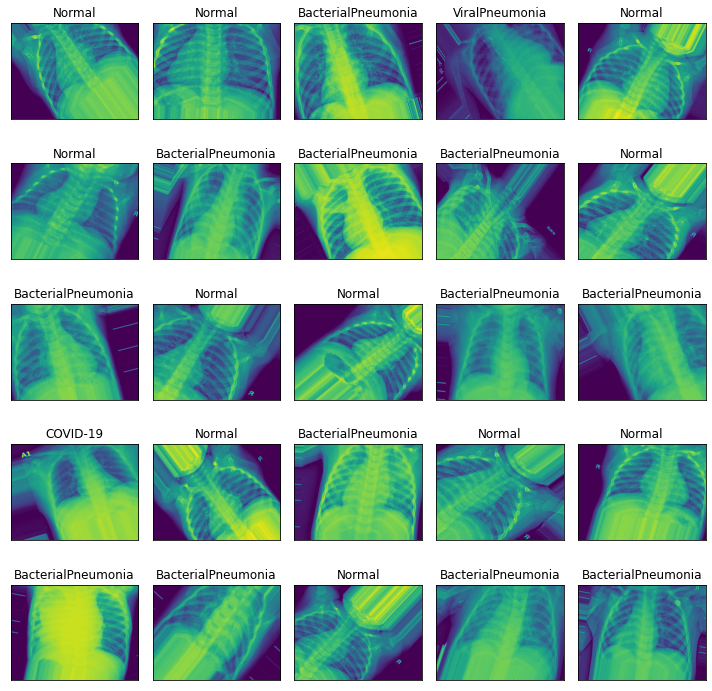

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()


Train , Test and Validaion split

In [27]:
train,test = train_test_split(Main_Data,test_size=0.2,random_state=30,shuffle=True)

In [28]:
train.shape

(1666, 2)

In [29]:
test.shape

(417, 2)

In [30]:
train.head()


JPG        CATEGORY
1368                 TrainData\Normal\_340_9479596.jpeg          Normal
1028          TrainData\ViralPneumonia\_50_8917931.jpeg  ViralPneumonia
547                  TrainData\Normal\_587_6630060.jpeg          Normal
961   TrainData\OversampledAugmentedCOVID-19\COVID-1...        COVID-19
1715                  TrainData\Normal\_666_260368.jpeg          Normal

In [31]:
test.head()


JPG            CATEGORY
1664  TrainData\BacterialPneumonia\_143_2362293.jpeg  BacterialPneumonia
1784  TrainData\BacterialPneumonia\_478_8446174.jpeg  BacterialPneumonia
836               TrainData\Normal\_885_3923472.jpeg              Normal
271    TrainData\BacterialPneumonia\_280_788015.jpeg  BacterialPneumonia
6     TrainData\BacterialPneumonia\_249_5475787.jpeg  BacterialPneumonia

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [33]:
generator = ImageDataGenerator(rescale=1./255,
                              validation_split=0.1,
                              horizontal_flip=False,
                              featurewise_center=False,
                              featurewise_std_normalization=False,
                              rotation_range=20,
                              zoom_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest',
                              height_shift_range=0.1)


In [34]:
img = imread('C:\\Users\\aritr\\OneDrive\\Desktop\\covid-detection-from-xray\\TrainData\\BacterialPneumonia\\_0_4754176.jpeg')

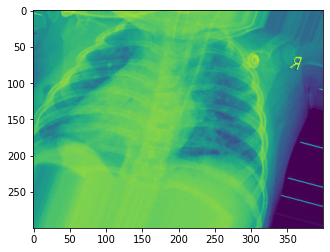

In [35]:
plt.imshow(img)

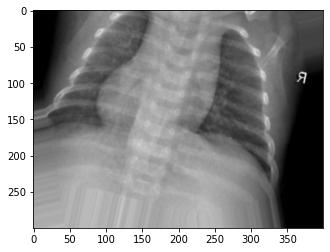

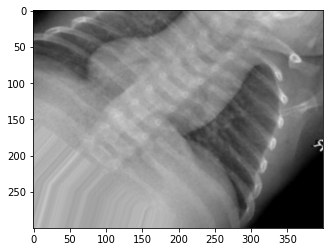

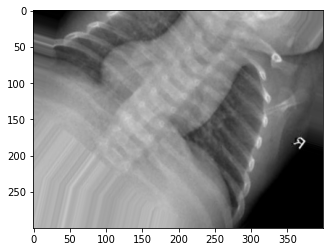

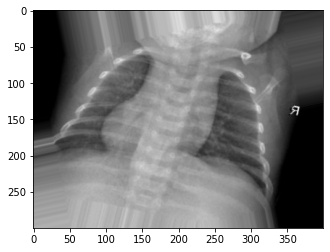

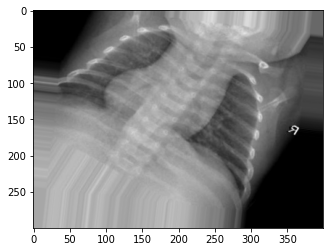

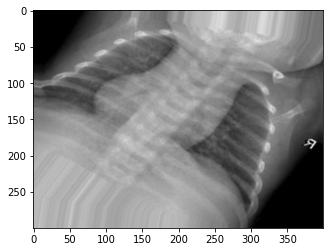

In [36]:
Example_IMG = train["JPG"][5]
IMG = image.load_img(Example_IMG,target_size=(300,400))
Array_IMG = image.img_to_array(IMG)
Array_IMG = Array_IMG.reshape((1,)+Array_IMG.shape)

i = 0
for img in generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    IMG_Plot = plt.imshow(image.array_to_img(img[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [37]:
train_img_gen = generator.flow_from_dataframe(dataframe=train,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="rgb",
                                             class_mode="categorical",
                                             subset="training",
                                             batch_size=32)

Found 1500 validated image filenames belonging to 4 classes.


In [38]:
val_img_gen = generator.flow_from_dataframe(dataframe=train,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="rgb",
                                             class_mode="categorical",
                                             subset="validation",
                                             batch_size=32)

Found 166 validated image filenames belonging to 4 classes.


In [39]:
Test_Generator = ImageDataGenerator(rescale=1./255)


In [40]:
test_img_gen = Test_Generator.flow_from_dataframe(dataframe=test,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="rgb",
                                             class_mode="categorical",
                                             batch_size=32)


Found 417 validated image filenames belonging to 4 classes.


In [41]:
for data_batch,label_batch in train_img_gen:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 4)


In [42]:
for data_batch,label_batch in val_img_gen:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 4)


In [43]:
for data_batch,label_batch in test_img_gen:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 4)


In [44]:
print(train_img_gen.class_indices)
print(train_img_gen.classes[0:5])
print(train_img_gen.image_shape)

print(val_img_gen.class_indices)
print(val_img_gen.classes[0:5])
print(val_img_gen.image_shape)

{'BacterialPneumonia': 0, 'COVID-19': 1, 'Normal': 2, 'ViralPneumonia': 3}
[2, 3, 2, 0, 2]
(256, 256, 3)
{'BacterialPneumonia': 0, 'COVID-19': 1, 'Normal': 2, 'ViralPneumonia': 3}
[2, 3, 2, 1, 2]
(256, 256, 3)


In [45]:
print(test_img_gen.class_indices)
print(test_img_gen.classes[0:5])
print(test_img_gen.image_shape)

{'BacterialPneumonia': 0, 'COVID-19': 1, 'Normal': 2, 'ViralPneumonia': 3}
[0, 0, 2, 0, 0]
(256, 256, 3)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [47]:
Model = Sequential()

Model.add(Conv2D(filters = 32,kernel_size=(5,5),activation="relu",
                 input_shape=(256,256,3),padding="same",strides=(2,2)))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation="relu",padding="same",strides=(2,2)))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(filters=128,kernel_size=(2,2),
                 activation="relu",padding="same",strides=(2,2)))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(4,activation="softmax"))


In [48]:
Model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [49]:
from tensorflow.keras.callbacks import EarlyStopping


In [50]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1)


In [51]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [52]:
model = Model.fit(train_img_gen,
            validation_data=val_img_gen,
            epochs=60,batch_size=28)

Epoch 1/60
47/47 [==============================] - 38s 527ms/step - loss: 1.3028 - accuracy: 0.3984 - val_loss: 1.1623 - val_accuracy: 0.5482

In [53]:
Model_Results = Model.evaluate(test_img_gen,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])


LOSS:  0.6780
ACCURACY:  0.73


No handles with labels found to put in legend.


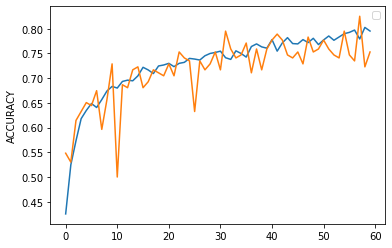

In [54]:
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [55]:
HistoryDict = model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

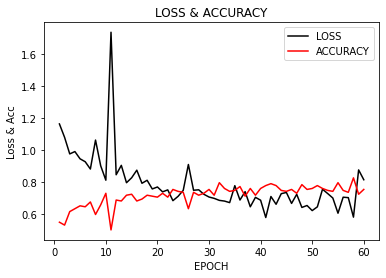

In [56]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()


<AxesSubplot:>

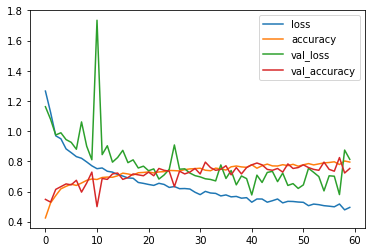

In [57]:
Dict_Summary = pd.DataFrame(model.history)
Dict_Summary.plot()

In [58]:
Model_Test_Prediction = Model.predict(test_img_gen)


In [59]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)


In [60]:
print(Model_Test_Prediction)


[2 3 0 2 2 0 3 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 2 1 0 2 2 2 3 3 0 3 0 3 0 0 0
 2 3 0 3 0 2 0 0 0 2 3 2 2 2 2 3 0 0 2 0 2 0 2 2 0 2 0 3 2 1 2 2 3 2 2 2 2
 0 2 2 2 2 2 2 2 0 0 2 0 0 1 0 0 2 2 0 2 2 0 1 2 1 2 2 0 0 3 2 3 3 0 3 0 2
 2 0 0 2 3 3 2 0 3 2 0 1 0 2 2 2 0 2 3 0 1 0 0 2 0 0 2 2 3 2 2 0 3 3 0 0 2
 1 0 0 3 0 0 2 2 3 2 2 3 3 0 3 0 0 2 3 3 3 0 0 3 3 0 2 3 2 3 0 2 0 2 0 0 0
 2 0 2 0 2 2 2 2 2 3 1 3 0 3 2 3 3 0 2 0 0 0 0 3 2 2 2 2 3 0 3 1 2 2 2 2 3
 3 2 2 0 2 0 1 0 1 3 3 2 0 3 2 0 2 3 2 0 0 2 0 2 3 2 0 0 3 2 0 2 2 2 2 1 3
 0 2 2 0 0 3 2 2 2 2 2 2 3 3 2 3 0 0 0 3 2 2 2 2 0 2 2 2 0 0 0 2 0 0 3 1 3
 2 0 3 2 2 0 0 2 2 2 3 3 0 0 2 2 3 3 3 2 2 3 2 0 2 0 0 2 0 2 0 2 0 0 3 0 2
 0 2 1 0 3 2 3 0 3 3 2 2 0 2 2 2 0 0 2 2 3 2 0 2 2 2 1 2 1 2 3 0 2 2 2 2 0
 2 0 3 0 0 2 2 2 0 0 3 2 2 3 0 0 0 0 2 3 2 1 3 2 3 1 2 0 3 2 2 0 2 3 1 0 2
 2 0 2 0 3 1 2 2 2 2]


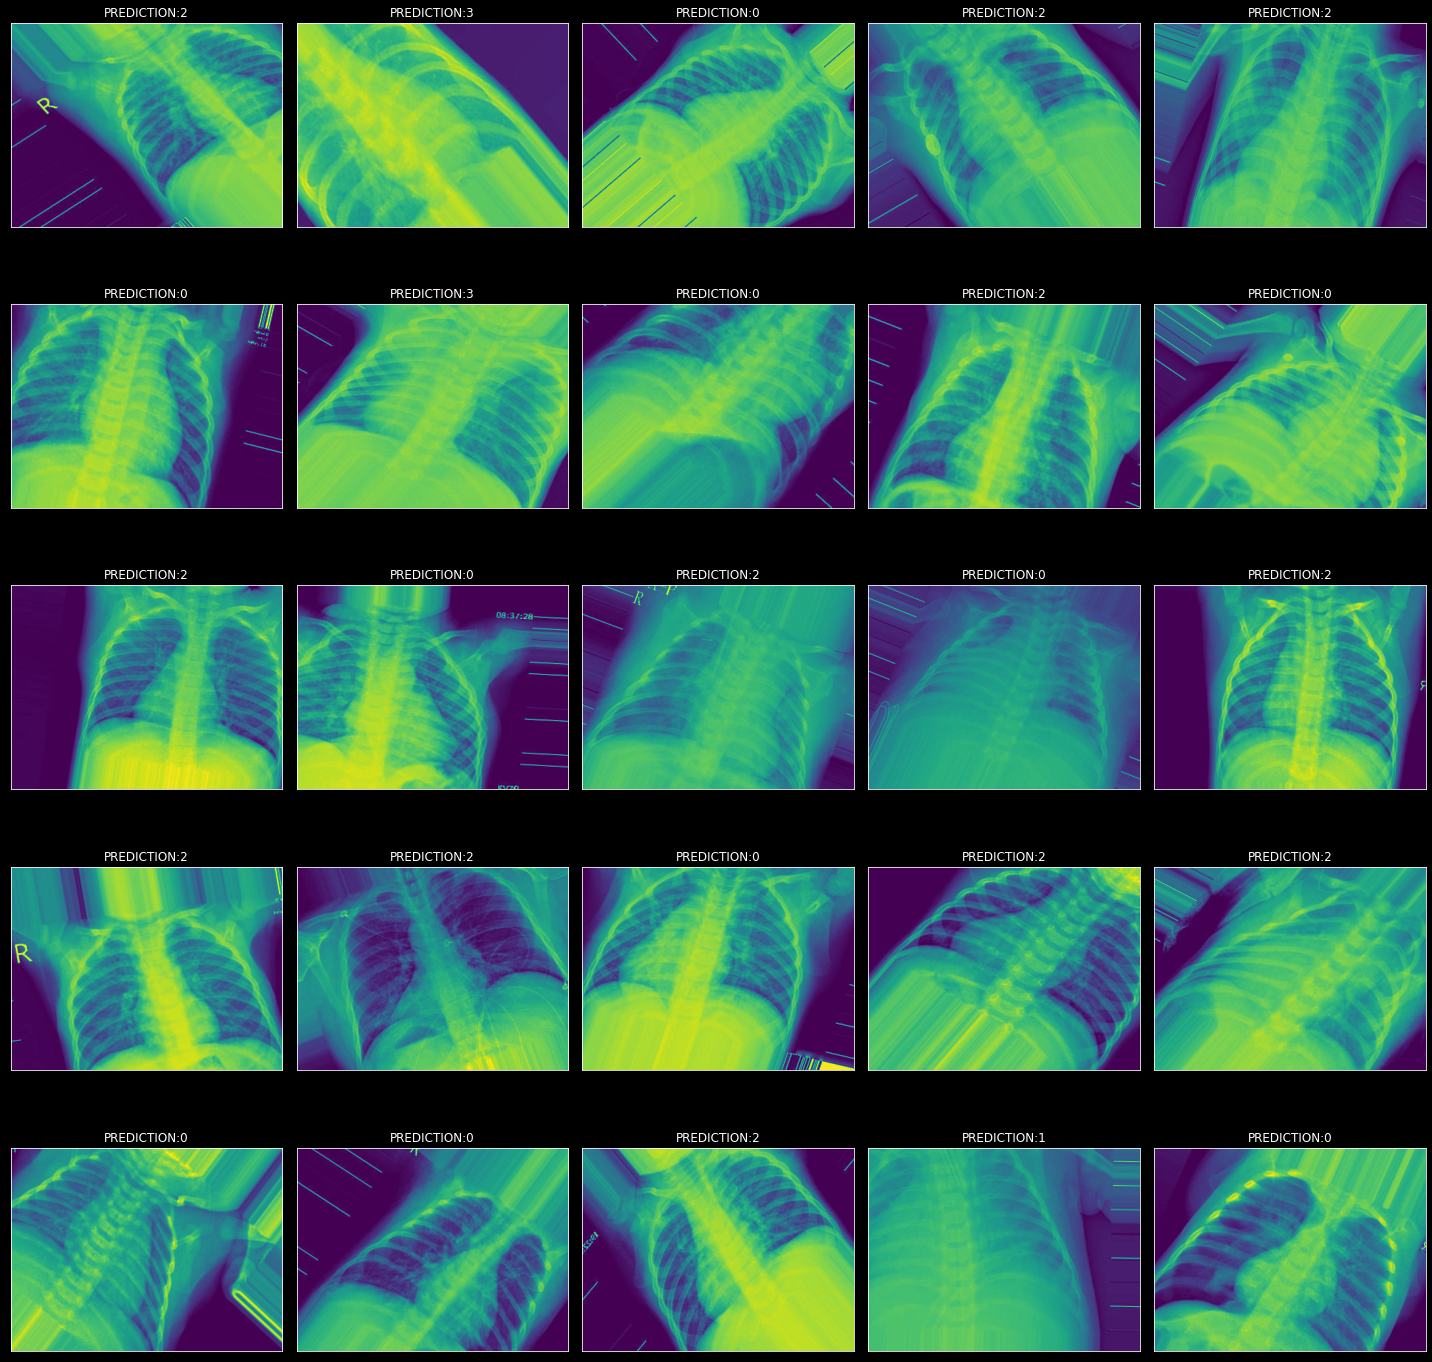

In [61]:
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
plt.tight_layout()
plt.show()



In [62]:
Any_IMG = train["JPG"][2]
IMG = image.load_img(Any_IMG,target_size=(256,256))
Array_IMG = image.img_to_array(IMG)
Array_IMG = np.expand_dims(Array_IMG,axis=0)
Array_IMG /= 255

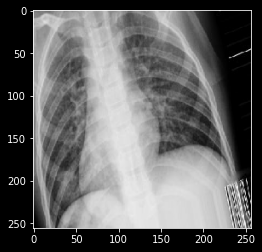

In [63]:
plt.imshow(Array_IMG[0])
plt.show()


In [64]:
layer_out = [layer.output for layer in Model.layers[:8]]


In [65]:
activation_model = models.Model(inputs=Model.input,outputs=layer_out)


In [66]:
activations = activation_model.predict(Array_IMG)


In [67]:
first_layer_act = activations[0]
print(first_layer_act.shape)

(1, 128, 128, 32)


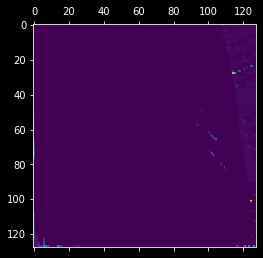

In [68]:
plt.matshow(first_layer_act[0,:,:,4],cmap="viridis")

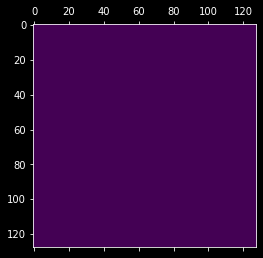

In [69]:
plt.matshow(first_layer_act[0,:,:,7],cmap="viridis")

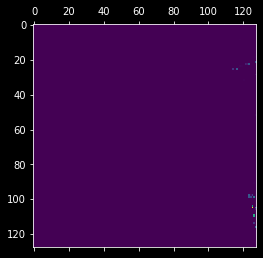

In [70]:
plt.matshow(first_layer_act[0,:,:,1],cmap="viridis")


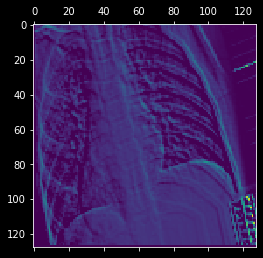

In [71]:
plt.matshow(first_layer_act[0,:,:,18],cmap="viridis")


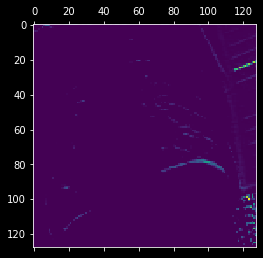

In [72]:
plt.matshow(first_layer_act[0,:,:,31],cmap="viridis")

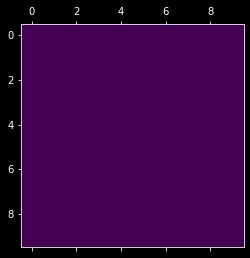

In [73]:
plt.matshow(first_layer_act[0,:10,:10,7],cmap="viridis")


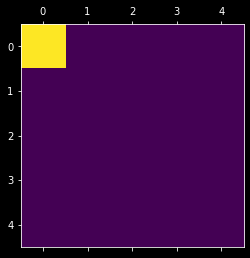

In [74]:
plt.matshow(first_layer_act[0,:5,:5,14],cmap="viridis")

Saving Model

In [156]:
Model.save('X-ray_Checker.h5')

In [157]:
new_model = models.load_model('X-ray_Checker.h5')
Model_Results = new_model.evaluate(test_img_gen,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.6780
ACCURACY:  0.73


Checking User's Image

In [183]:
New_Img_Path = "./ValData/Normal/132.jpeg"
IMG_Load = image.load_img(New_Img_Path,target_size=(256,256))
N_IMG_Array = image.img_to_array(IMG_Load)

In [184]:
print(N_IMG_Array.shape)


(256, 256, 3)


In [185]:
N_IMG_Array = np.expand_dims(N_IMG_Array,axis=0)
print(N_IMG_Array)


[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [186]:
New_Predict = new_model.predict(N_IMG_Array)
print(New_Predict.argmax(axis=-1))


[2]


In [187]:
if New_Predict.argmax(axis=-1) == 3 :
    print("ViralPneumonia")
elif New_Predict.argmax(axis=-1) == 2 :
    print("Normal")
elif New_Predict.argmax(axis=-1) == 1 :
    print("Covid")
else:
    print("BacterialPneumonia")

Normal
